In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.patches as patches

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving team_gca_sca_90_2022.csv to team_gca_sca_90_2022.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded["team_gca_sca_90_2022.csv"]))
df

,Rk,team_name,minutes_90s,gca,sca,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Bayern Munich,13.0,65.0,395.0,NaN,NaN
3,2.0,Liverpool,13.0,65.0,392.0,NaN,NaN
4,3.0,Real Madrid,14.0,62.0,381.0,NaN,NaN
...,...,...,...,...,...,...,...
97,96.0,Salernitana,14.0,14.0,228.0,NaN,NaN
98,97.0,Arminia,13.0,13.0,205.0,NaN,NaN
99,98.0,Norwich City,13.0,10.0,199.0,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.columns.tolist())

['Rk', 'team_name', 'minutes_90s', 'gca', 'sca', 'Unnamed: 5', 'Unnamed: 6']


In [ ]:
prog_final = df[['team_name', 'minutes_90s', 'gca', 'sca']]
prog_final

,team_name,minutes_90s,gca,sca
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Bayern Munich,13.0,65.0,395.0
3,Liverpool,13.0,65.0,392.0
4,Real Madrid,14.0,62.0,381.0
...,...,...,...,...
97,Salernitana,14.0,14.0,228.0
98,Arminia,13.0,13.0,205.0
99,Norwich City,13.0,10.0,199.0
100,NaN,NaN,NaN,NaN


In [ ]:
prog_final['gca_90'] = prog_final['gca'] / prog_final['minutes_90s']
prog_final['sca_90'] = prog_final['sca'] / prog_final['minutes_90s']

prog_final = prog_final.round({'gca_90':2, 'sca_90':2})

prog_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,team_name,minutes_90s,gca,sca,gca_90,sca_90
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Bayern Munich,13.0,65.0,395.0,5.00,30.38
3,Liverpool,13.0,65.0,392.0,5.00,30.15
4,Real Madrid,14.0,62.0,381.0,4.43,27.21
...,...,...,...,...,...,...
97,Salernitana,14.0,14.0,228.0,1.00,16.29
98,Arminia,13.0,13.0,205.0,1.00,15.77
99,Norwich City,13.0,10.0,199.0,0.77,15.31
100,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prog_final.describe()

,minutes_90s,gca,sca,gca_90,sca_90
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,13.897959,30.469388,268.000000,2.198980,19.333367
std,0.867391,11.558193,50.730133,0.854584,3.760459
min,12.000000,10.000000,172.000000,0.770000,12.930000
25%,13.000000,21.250000,229.000000,1.572500,17.017500
50%,14.000000,28.500000,261.500000,2.070000,18.790000
75%,15.000000,38.000000,300.750000,2.670000,21.805000
max,15.000000,65.000000,395.000000,5.000000,30.380000


In [ ]:
prog_final['sca_rank'] = prog_final.sca_90.rank(pct=True)

prog_final['gca_rank'] = prog_final.gca_90.rank(pct=True)

prog_final

,team_name,minutes_90s,gca,sca,gca_90,sca_90,sca_rank,gca_rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bayern Munich,13.0,65.0,395.0,5.00,30.38,1.000000,0.994898
3,Liverpool,13.0,65.0,392.0,5.00,30.15,0.989796,0.994898
4,Real Madrid,14.0,62.0,381.0,4.43,27.21,0.964286,0.979592
...,...,...,...,...,...,...,...,...
97,Salernitana,14.0,14.0,228.0,1.00,16.29,0.183673,0.030612
98,Arminia,13.0,13.0,205.0,1.00,15.77,0.142857,0.030612
99,Norwich City,13.0,10.0,199.0,0.77,15.31,0.112245,0.010204
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filt_top = ((prog_final['gca_rank'] > .5) & (prog_final['sca_rank'] > .5))

top = prog_final[filt_top]
top = top.sort_values(['gca_rank', 'sca_rank'], ascending=[False, False])

top

,team_name,minutes_90s,gca,sca,gca_90,sca_90,sca_rank,gca_rank
2,Bayern Munich,13.0,65.0,395.0,5.00,30.38,1.000000,0.994898
3,Liverpool,13.0,65.0,392.0,5.00,30.15,0.989796,0.994898
4,Real Madrid,14.0,62.0,381.0,4.43,27.21,0.964286,0.979592
5,Inter,14.0,56.0,357.0,4.00,25.50,0.928571,0.969388
7,Dortmund,13.0,50.0,305.0,3.85,23.46,0.887755,0.959184
8,Chelsea,13.0,49.0,346.0,3.77,26.62,0.948980,0.948980
6,Paris S-G,15.0,54.0,330.0,3.60,22.00,0.785714,0.938776
10,Leverkusen,13.0,45.0,245.0,3.46,18.85,0.515306,0.928571
12,Hoffenheim,13.0,44.0,269.0,3.38,20.69,0.688776,0.918367
17,RB Leipzig,13.0,42.0,284.0,3.23,21.85,0.755102,0.897959


In [ ]:
filt_left = ((prog_final['gca_rank'] < .5) & (prog_final['sca_rank'] > .5))

left = prog_final[filt_left]
left = left.sort_values(['sca_rank', 'gca_rank'], ascending=[False, False])

left

,team_name,minutes_90s,gca,sca,gca_90,sca_90,sca_rank,gca_rank
75,Arsenal,13.0,21.0,299.0,1.62,23.00,0.846939,0.306122
78,Leeds United,13.0,21.0,269.0,1.62,20.69,0.688776,0.306122
68,Wolfsburg,13.0,23.0,262.0,1.77,20.15,0.663265,0.357143
82,Brighton,13.0,20.0,257.0,1.54,19.77,0.612245,0.234694
67,Udinese,14.0,24.0,271.0,1.71,19.36,0.591837,0.336735
81,Athletic Club,14.0,20.0,269.0,1.43,19.21,0.581633,0.193878
80,Saint-Étienne,15.0,21.0,287.0,1.40,19.13,0.571429,0.173469
44,Bordeaux,15.0,30.0,285.0,2.00,19.00,0.556122,0.469388
65,Mainz 05,13.0,24.0,246.0,1.85,18.92,0.530612,0.387755
93,Southampton,13.0,16.0,245.0,1.23,18.85,0.515306,0.091837


In [ ]:
filt_right = ((prog_final['gca_rank'] > .5) & (prog_final['sca_rank'] < .5))

right = prog_final[filt_right]
right =  right.sort_values('gca_rank', ascending=False)

right

,team_name,minutes_90s,gca,sca,gca_90,sca_90,sca_rank,gca_rank
9,Hellas Verona,14.0,47.0,250.0,3.36,17.86,0.448980,0.908163
27,Strasbourg,15.0,38.0,232.0,2.53,15.47,0.132653,0.714286
29,Monaco,15.0,37.0,259.0,2.47,17.27,0.326531,0.663265
43,Union Berlin,13.0,31.0,227.0,2.38,17.46,0.357143,0.622449
37,Genoa,14.0,33.0,240.0,2.36,17.14,0.295918,0.612245
47,Leicester City,13.0,29.0,229.0,2.23,17.62,0.423469,0.602041
51,Aston Villa,13.0,28.0,214.0,2.15,16.46,0.193878,0.571429
39,Angers,15.0,32.0,237.0,2.13,15.80,0.163265,0.540816
60,Watford,13.0,27.0,237.0,2.08,18.23,0.479592,0.525510


In [ ]:
filt_bottom = ((prog_final['gca_rank'] <=.5) & (prog_final['sca_rank'] <= .5))

bottom = prog_final[filt_bottom]

bottom

,team_name,minutes_90s,gca,sca,gca_90,sca_90,sca_rank,gca_rank
41,Brest,15.0,31.0,269.0,2.07,17.93,0.469388,0.500000
46,Cagliari,14.0,29.0,221.0,2.07,15.79,0.153061,0.500000
48,Lille,15.0,29.0,265.0,1.93,17.67,0.438776,0.443878
49,Montpellier,15.0,29.0,281.0,1.93,18.73,0.500000,0.443878
50,Villarreal,14.0,29.0,245.0,2.07,17.50,0.377551,0.500000
54,Nantes,15.0,28.0,257.0,1.87,17.13,0.280612,0.408163
55,Real Sociedad,15.0,28.0,254.0,1.87,16.93,0.244898,0.408163
56,Sampdoria,14.0,28.0,246.0,2.00,17.57,0.408163,0.469388
57,Valencia,15.0,28.0,257.0,1.87,17.13,0.280612,0.408163
59,Reims,15.0,27.0,268.0,1.80,17.87,0.459184,0.367347


In [ ]:
def setup_axes1(fig, rect):
    """
    Function to create a floating diamond axis.
    """
    tr = Affine2D().scale(2, 2).rotate_deg(45)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, 1, 0, 1),
        grid_locator1=MaxNLocator(nbins=10),
        grid_locator2=MaxNLocator(nbins=10))
    
    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    
    fig.add_subplot(ax1)
    
    aux_ax = ax1.get_aux_axes(tr)
    
    bg = "#141414"
    ax1.set_facecolor(bg)
    
    matplotlib.rc('axes',edgecolor='#A6A6A6')
    
    ax1.axis["bottom"].major_ticklabels.set_color("white")
    ax1.axis["left"].major_ticklabels.set_color("white")
    
    ax1.axis["bottom"].major_ticklabels.set_visible(False)
    ax1.axis["left"].major_ticklabels.set_visible(False)
    
    ax1.tick_params(axis = "x", which = "both", bottom = False, top = False)
    ax1.tick_params(axis = "y", which = "both", bottom = False, top = False)
    
    ax1.grid(zorder=1,color="white",alpha=0.2)
    return ax1, aux_ax

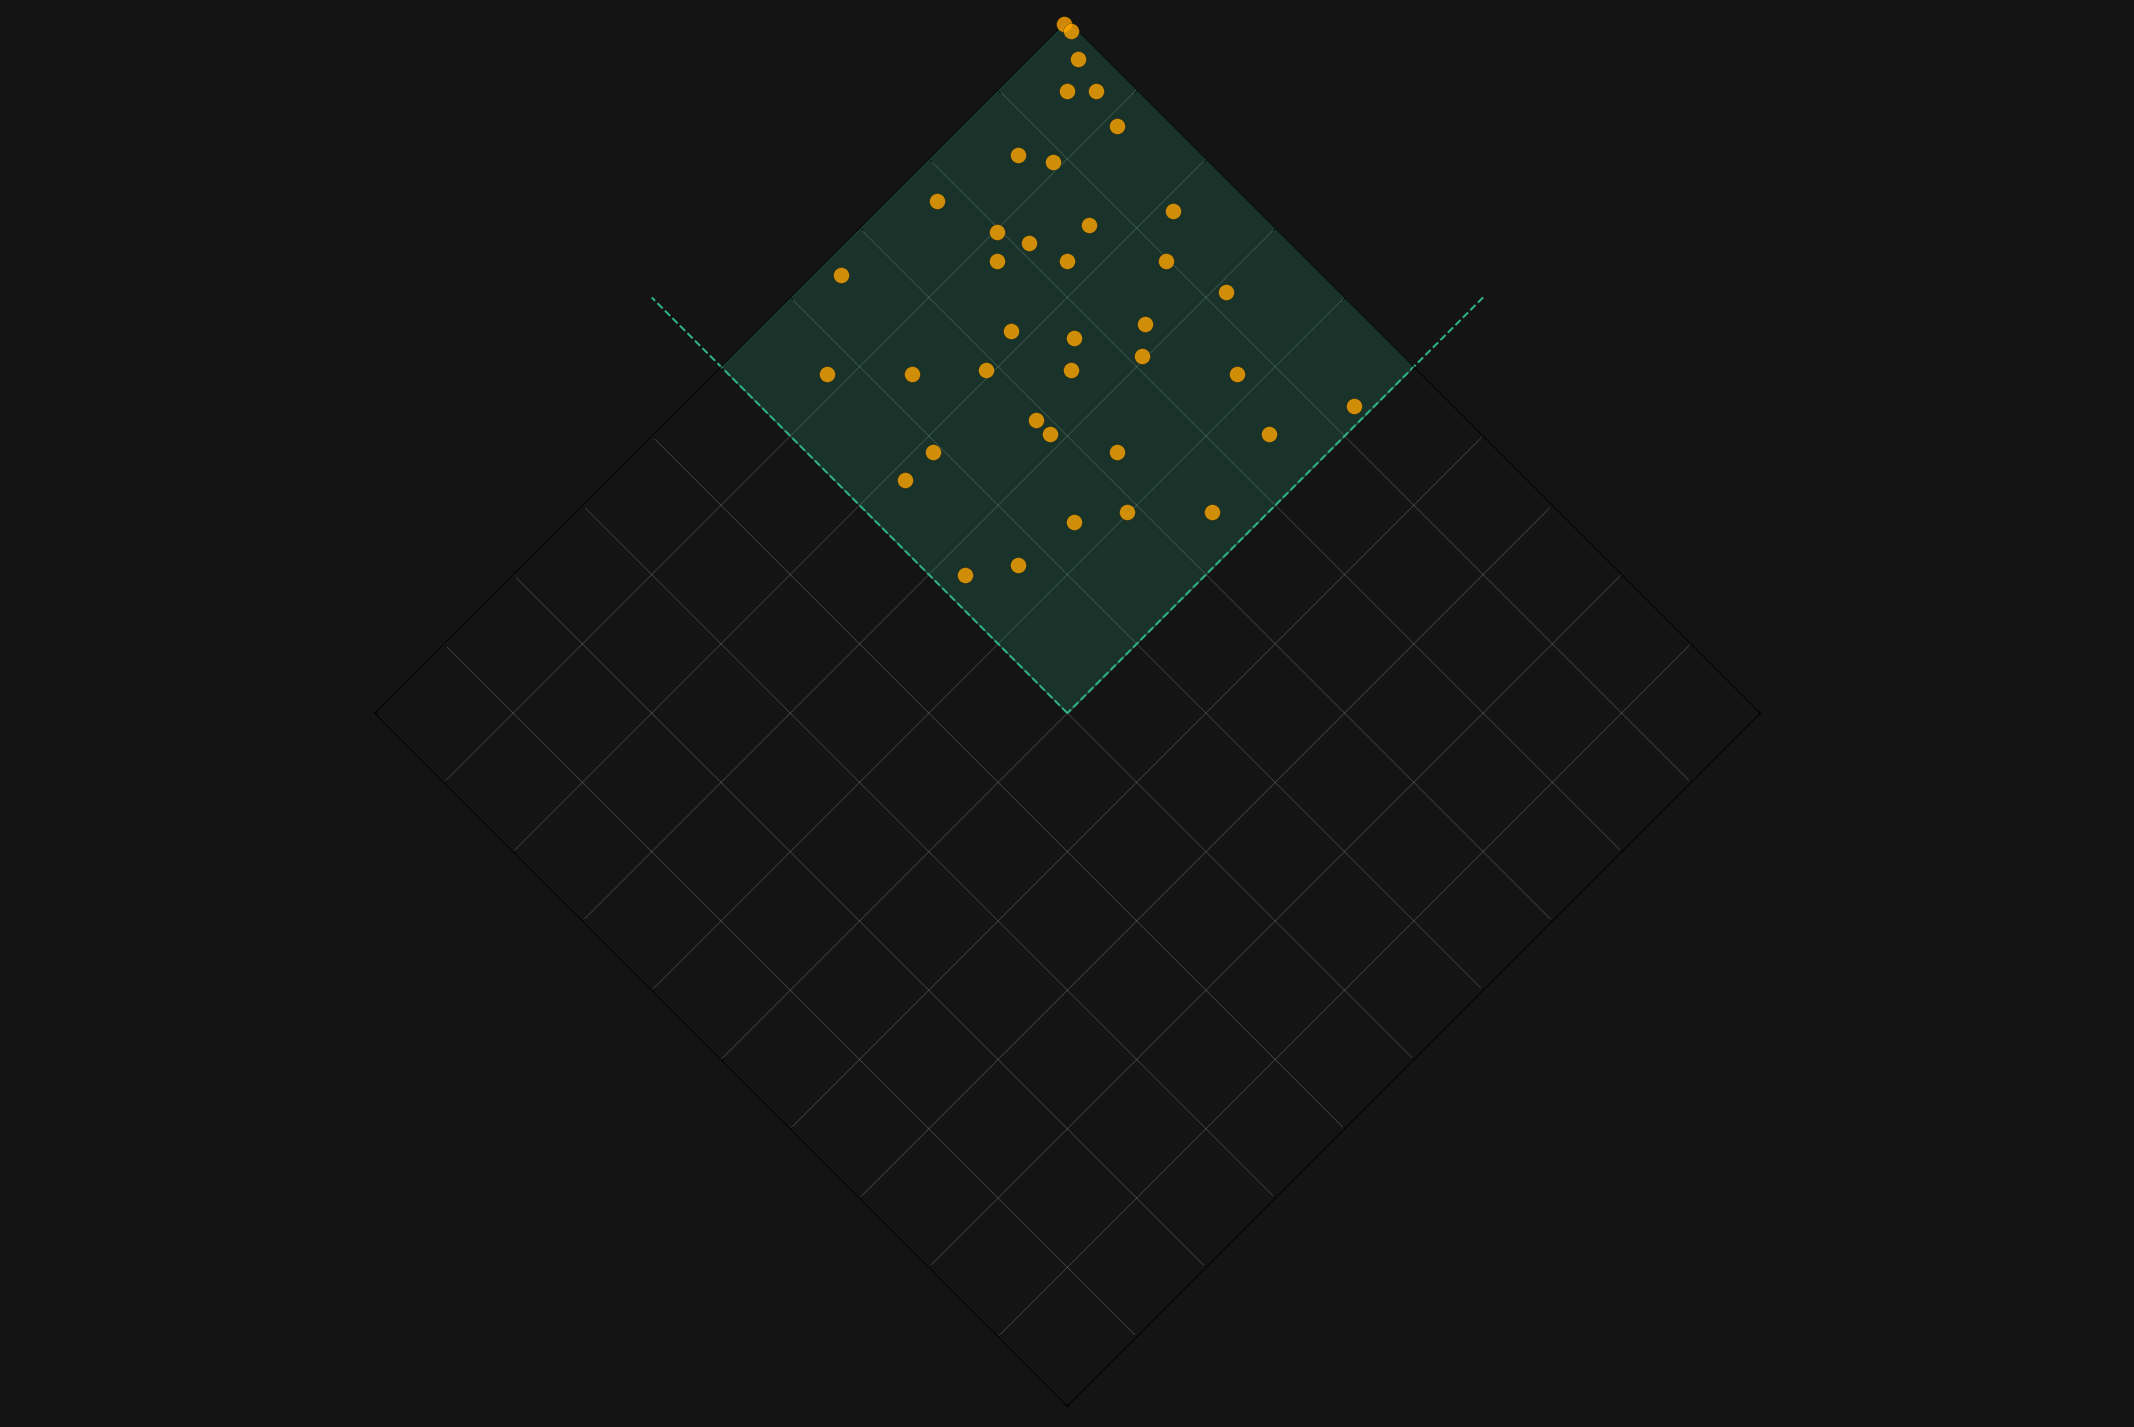

In [ ]:
fig = plt.figure(figsize=(38,26))

ax1, aux_ax1 = setup_axes1(fig, 111)

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

aux_ax1.set_facecolor(bg)
fig.set_facecolor(bg)

aux_ax1.plot([1.1,.5], [.5,.5], color='#2FB485', linestyle = "--", lw=2, zorder=2)
aux_ax1.plot([.5,.5], [.5,1.1], color='#2FB485', linestyle = "--", lw=2, zorder=2)

aux_ax1.fill_between([1,.5], [.5,.5], [1,1], [.5,1], color="#2FB485", alpha=0.2, zorder=2)

#Top
x = top['gca_rank'].tolist()
y = top['sca_rank'].tolist()

aux_ax1.scatter(x, y, s=250, color = '#ffa500', edgecolors='black', alpha=0.8,  lw=0.25, zorder=3)

In [ ]:
#Left
x1 = left['gca_rank'].tolist()
y1 = left['sca_rank'].tolist()

aux_ax1.scatter(x1, y1, s=250, color = '#18c585', edgecolors='black', alpha=0.8, lw=0.25, zorder=3)


In [ ]:
#Right
x2 = right['gca_rank'].tolist()
y2 = right['sca_rank'].tolist()

aux_ax1.scatter(x2, y2,s=250, color = '#4CA6FF', edgecolors='black', alpha=0.8,  lw=0.25, zorder=3)

In [ ]:
#Bottom:
aux_ax1.scatter(bottom['gca_rank'],bottom['sca_rank'],s=250, color = 'red', edgecolors='#ffff00', lw=1., alpha=0.95, zorder=3)


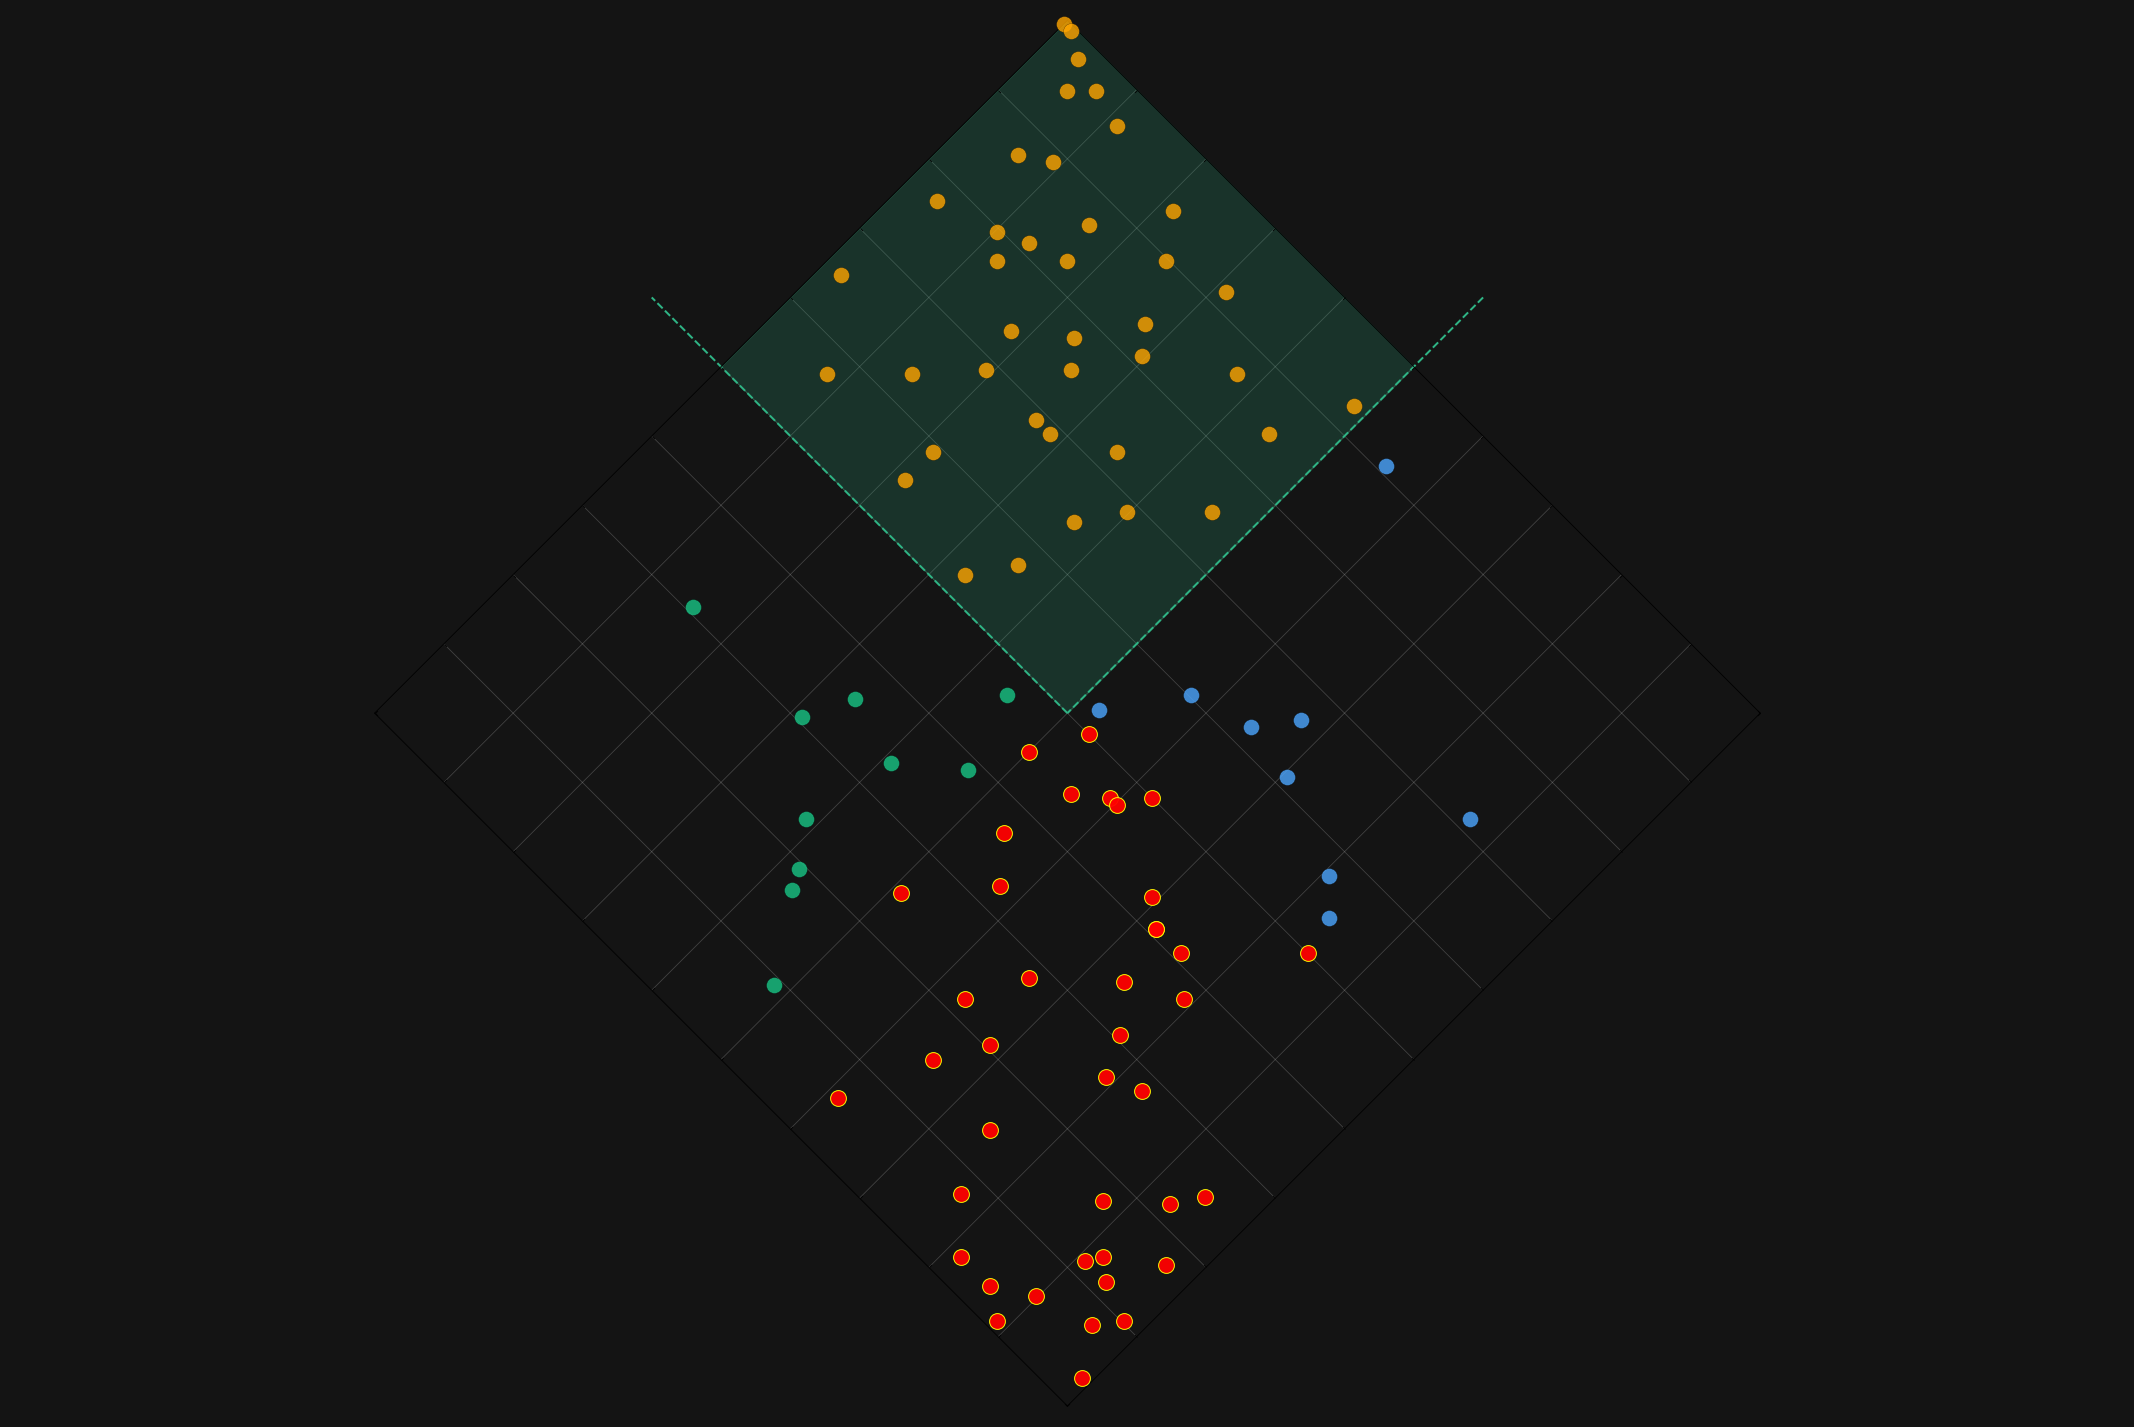

In [ ]:
fig

In [ ]:
for idx, row in top.iterrows():
    aux_ax1.annotate(row['team_name'], (row['gca_rank'], row['sca_rank']), color='white', weight = 'bold', size = 11 , ha='right')

for idx, row in left.iterrows():
  aux_ax1.annotate(row['team_name'], (row['gca_rank'], row['sca_rank']), color='white', weight = 'bold', size = 11 , ha='right')

for idx, row in right.iterrows():
  aux_ax1.annotate(row['team_name'], (row['gca_rank'], row['sca_rank']), color='white', weight = 'bold', size = 11 , ha='left')

for idx, row in bottom.iterrows():
  aux_ax1.annotate(row['team_name'], (row['gca_rank'], row['sca_rank']), color='white', weight = 'bold', size = 11 , ha='left')

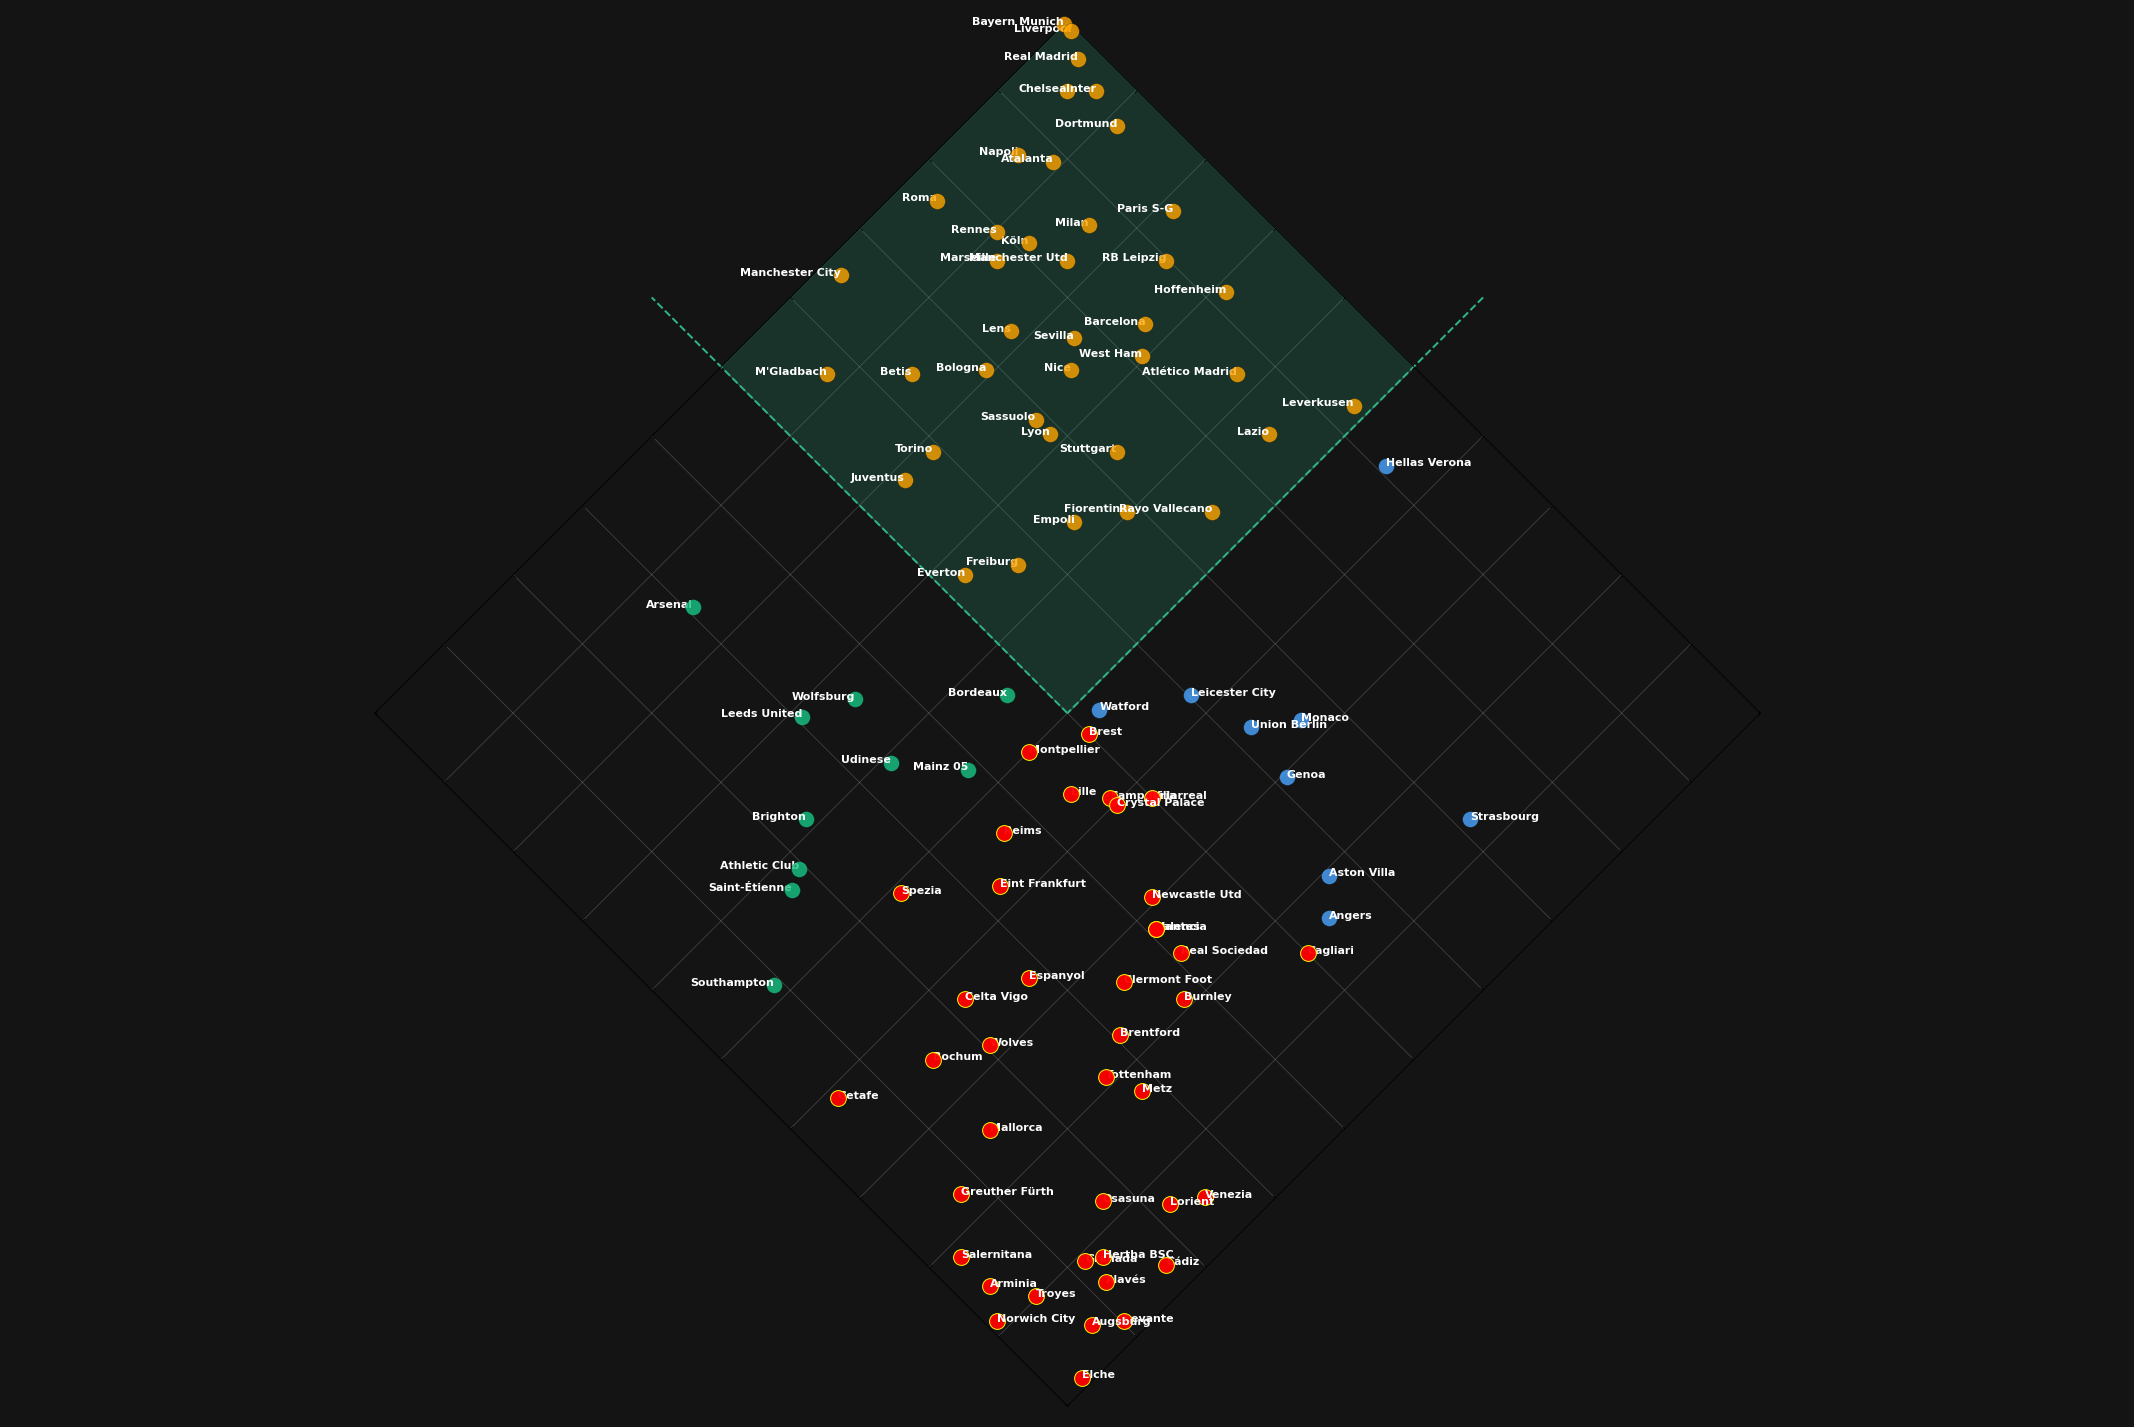

In [ ]:
fig

In [ ]:
#Text
fig.text(0.515, 0.89, "Leaders In Goal Creation Actions & Shot Creation Actions per 90 mins", size=17, zorder=8, color="white", ha="center", fontweight="bold")

d = fig.text(0.631, 0.230, "- Goal Creation Actions +", rotation =45, size=26, zorder=8, color="white")

c = fig.text(0.294, 0.210, "+ Shot Creation Actions -",rotation =-45, size=26, zorder=8, color="white")

b = fig.text(0.24, 0.79, "Teams above this line rank highest\n in both Goal Creation Actions per 90 \nand Shot Creation Actions per 90", size=21, zorder=8, color="white")

fig.text(0.21,0.98, "Team Goal & Shot Creation Actions Statistics", size=53, zorder=8, color="white", ha="center", fontweight="bold")

fig.text(0.306,0.96, "Top 5 European Leagues | Season 2021-2022 | ", size=30, zorder=8, color="white", ha="center")

fig.text(0.87,0.97, "By: Gaurav Krishnan\n(@statocastgaurav)", size=29, zorder=8, color="white", ha="center")

fig.text(0.84,0.12, "Data: Fbref", size=20, zorder=8, color="white", ha="center")

Text(0.84, 0.12, 'Data: Fbref')

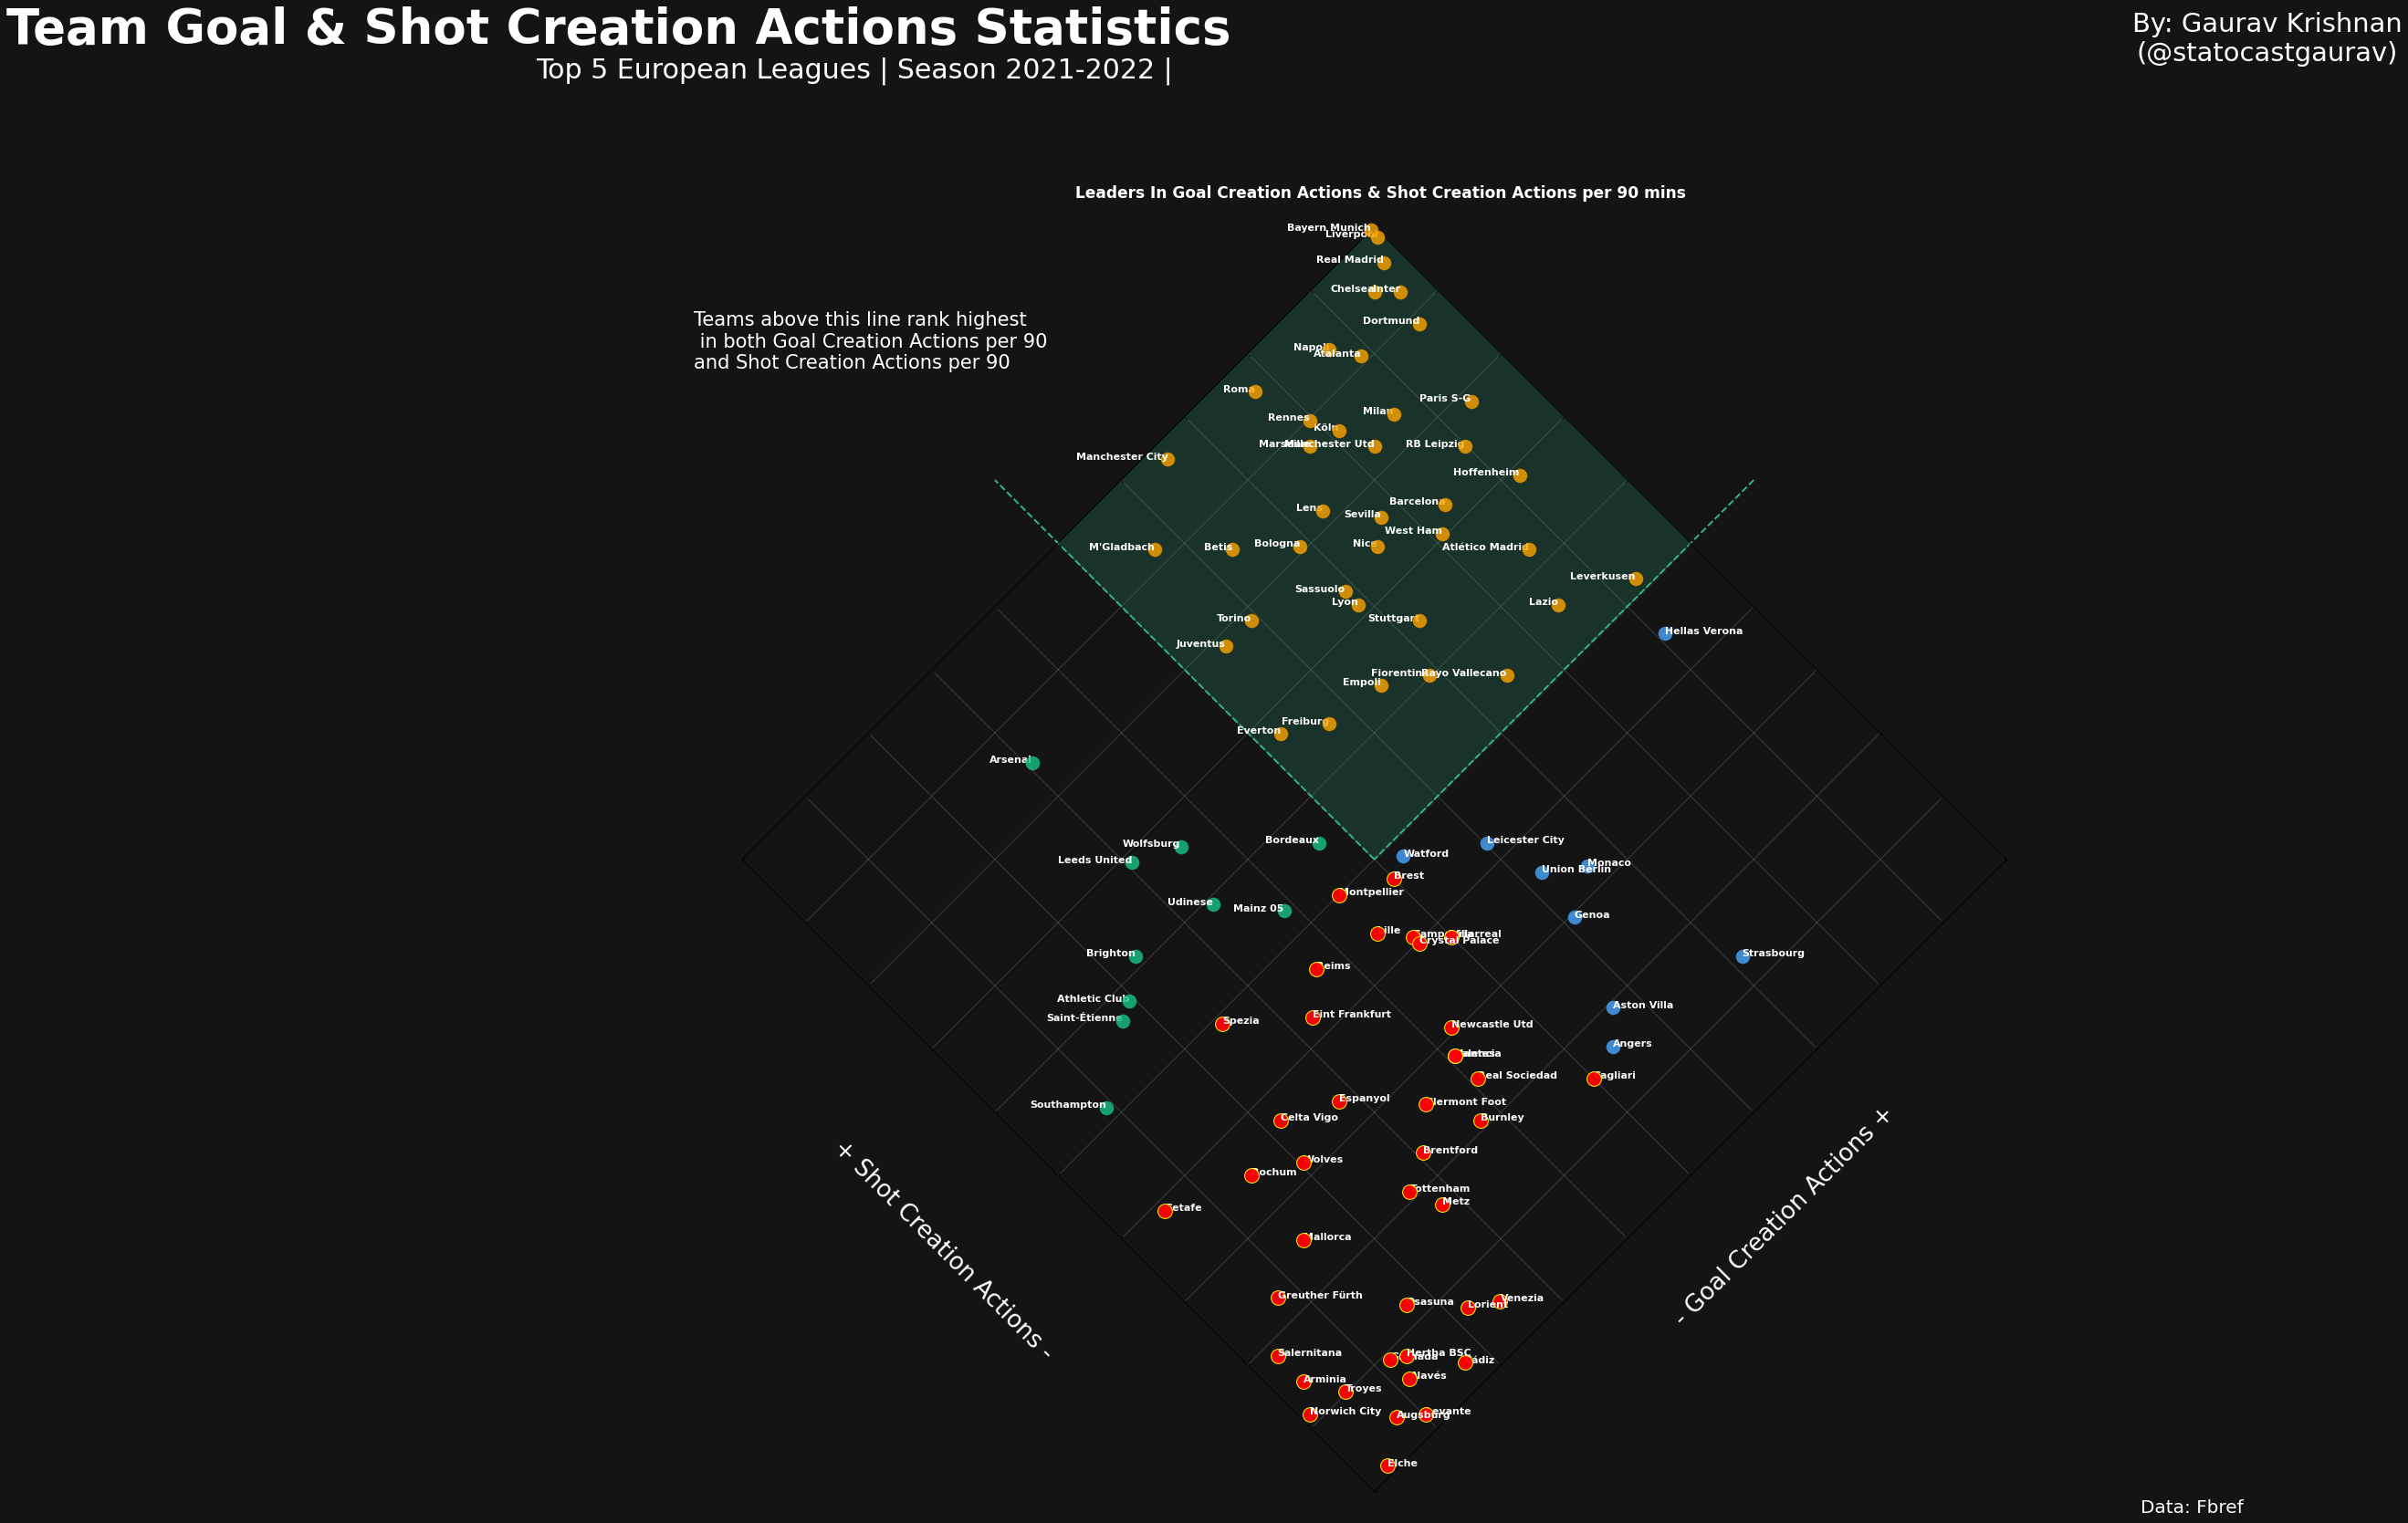

In [ ]:
fig

In [ ]:
#Arrows
style="Simple,tail_width=0.5,head_width=10,head_length=10"
kw = dict(arrowstyle=style, color="white")

a = patches.FancyArrowPatch((0.5,1.25), (0.49,1.07),
                            connectionstyle="arc3,rad=0.5", **kw,zorder=8,lw=0.5)

kw1 = dict(arrowstyle=style, color="#2FB485")

b = patches.FancyArrowPatch((-0.058,0.65),(-0.058,0.85),
                            **kw1,zorder=8,lw=1.2)

kw2 = dict(arrowstyle=style, color="#B41F28")

c = patches.FancyArrowPatch((-0.058,0.35),(-0.058,0.15),
                            **kw2,zorder=8,lw=1.2)

d = patches.FancyArrowPatch((0.35,-0.058),(0.15,-0.058),
                            **kw2,zorder=8,lw=1.2)

e = patches.FancyArrowPatch((0.65,-0.058),(0.85,-0.058),
                            **kw1,zorder=8,lw=1.2)


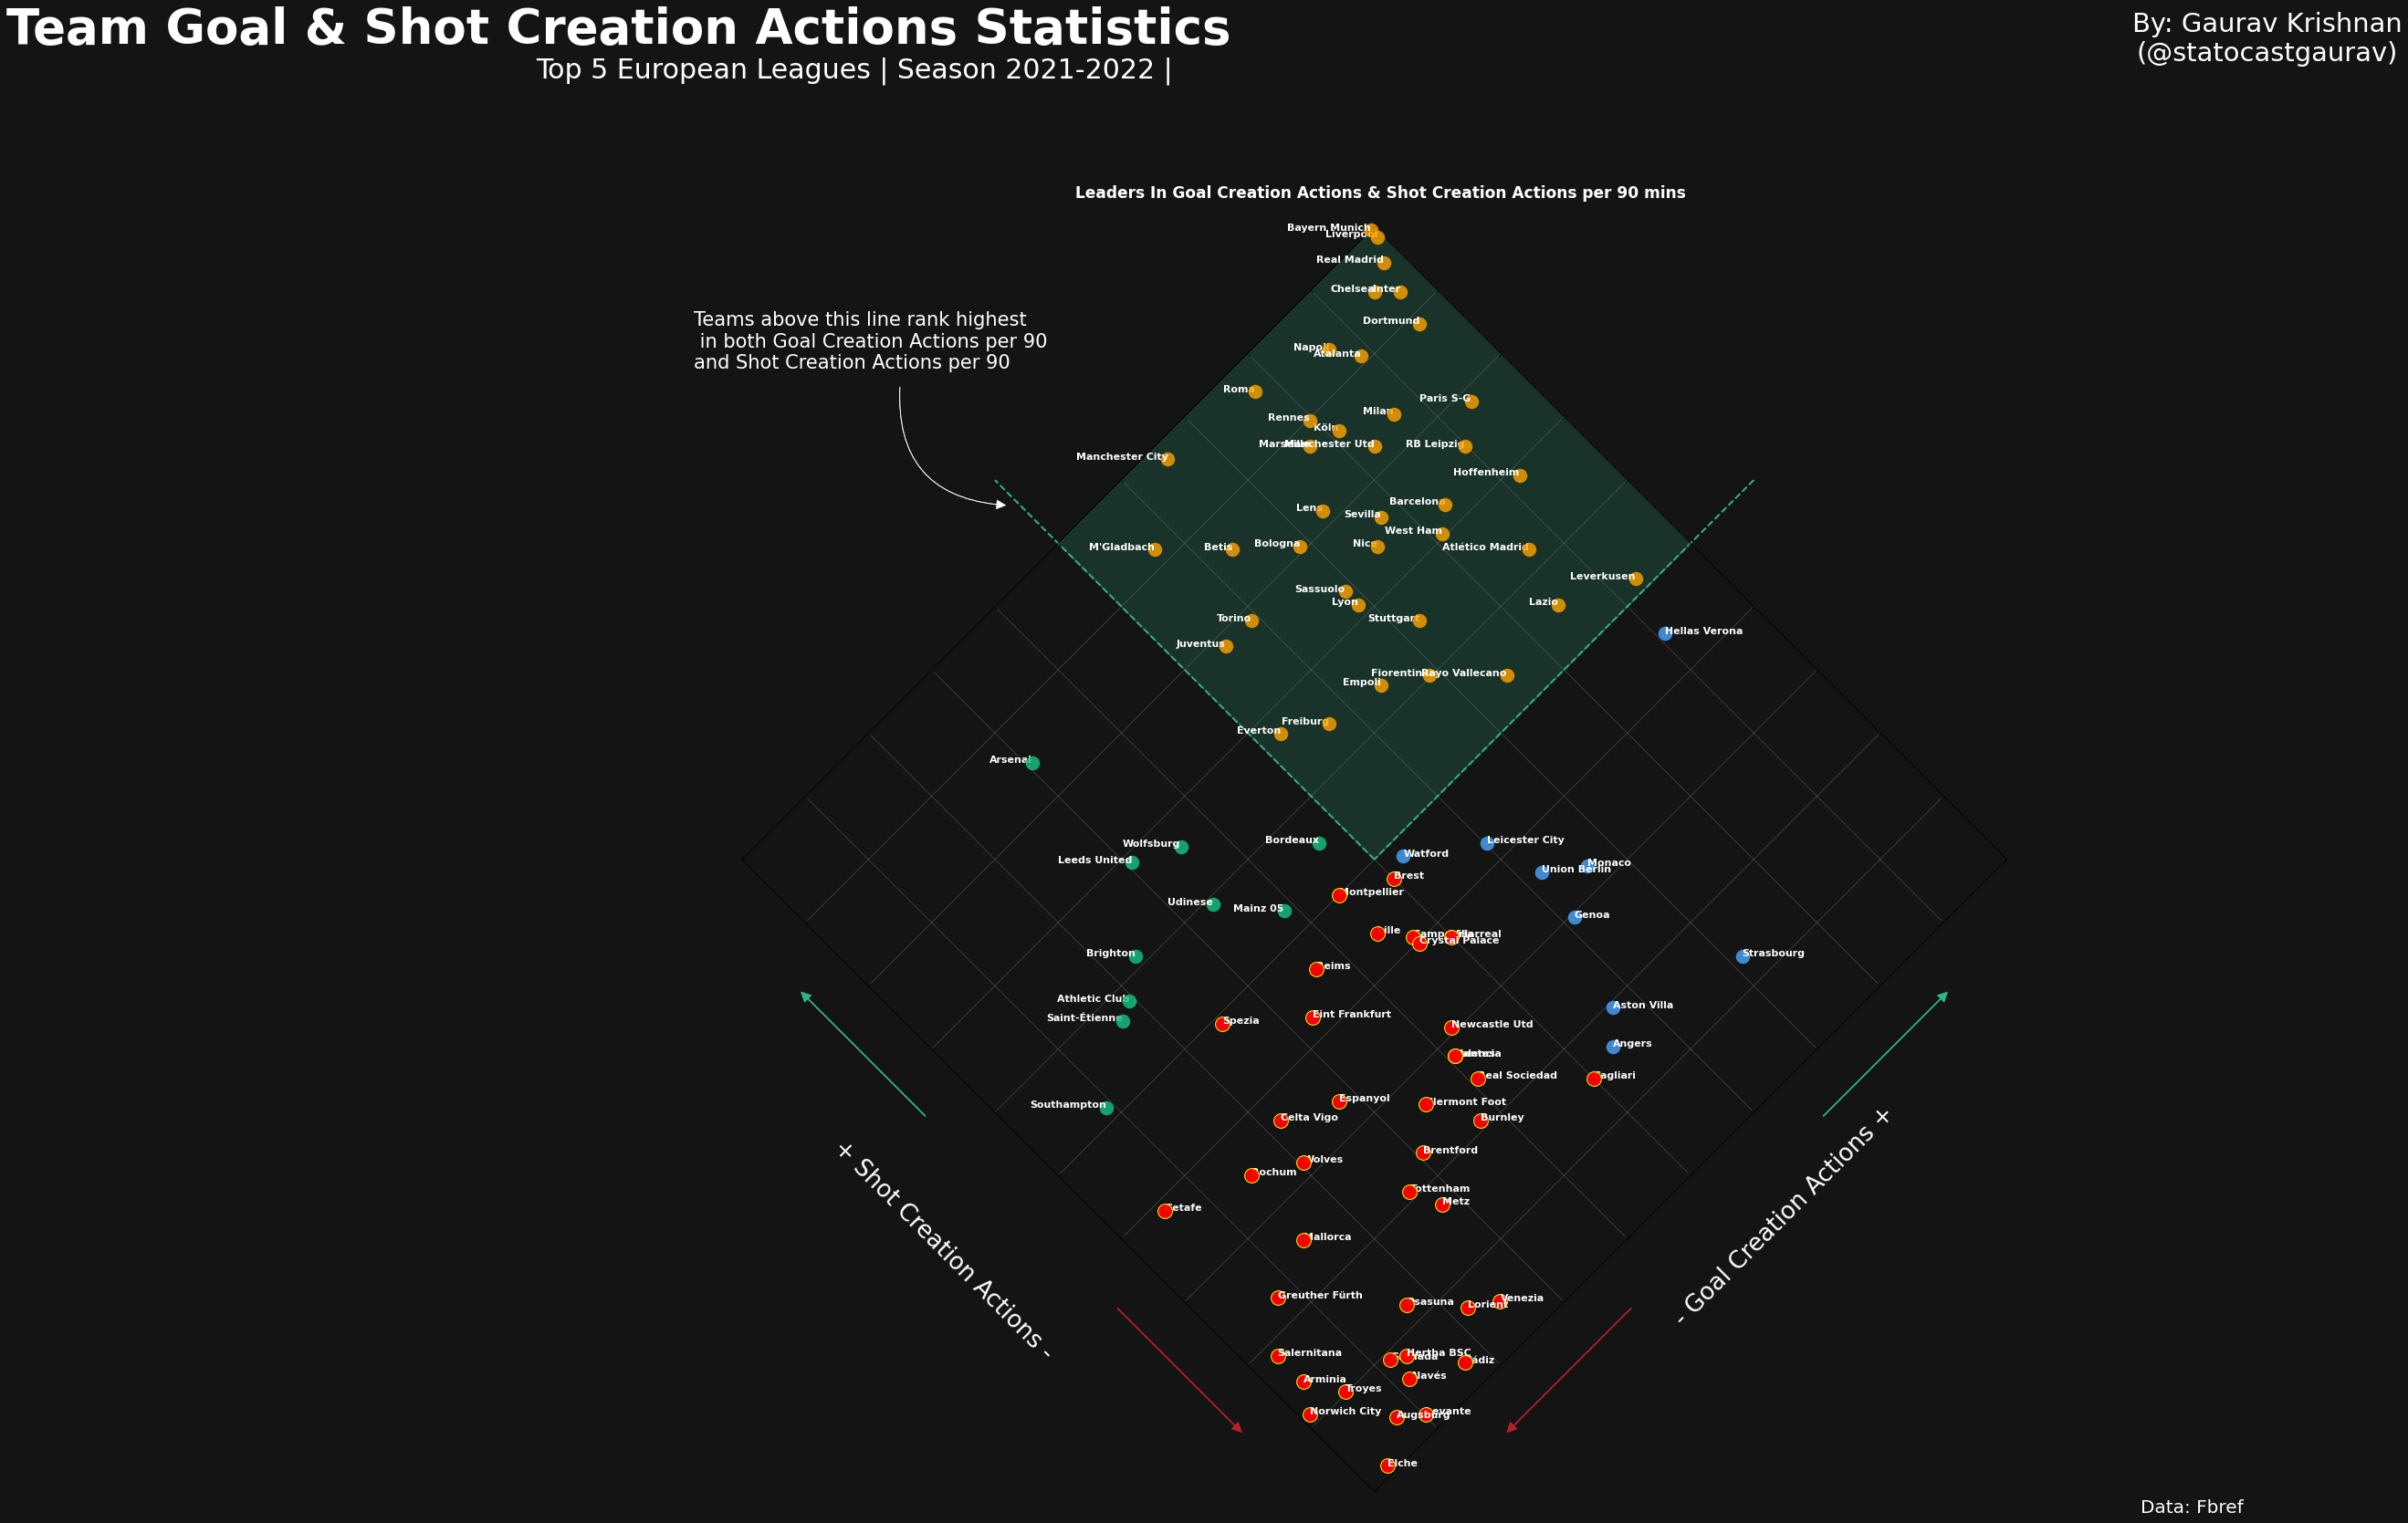

In [ ]:
aux_ax1.add_patch(a)
aux_ax1.add_patch(b)
aux_ax1.add_patch(c)
aux_ax1.add_patch(d)
aux_ax1.add_patch(e)


fig

In [ ]:
plt.savefig("Top5_teams_gca_sca_2022.jpg",facecolor=bg,bbox_inches="tight", dpi=800)

<Figure size 432x288 with 0 Axes>

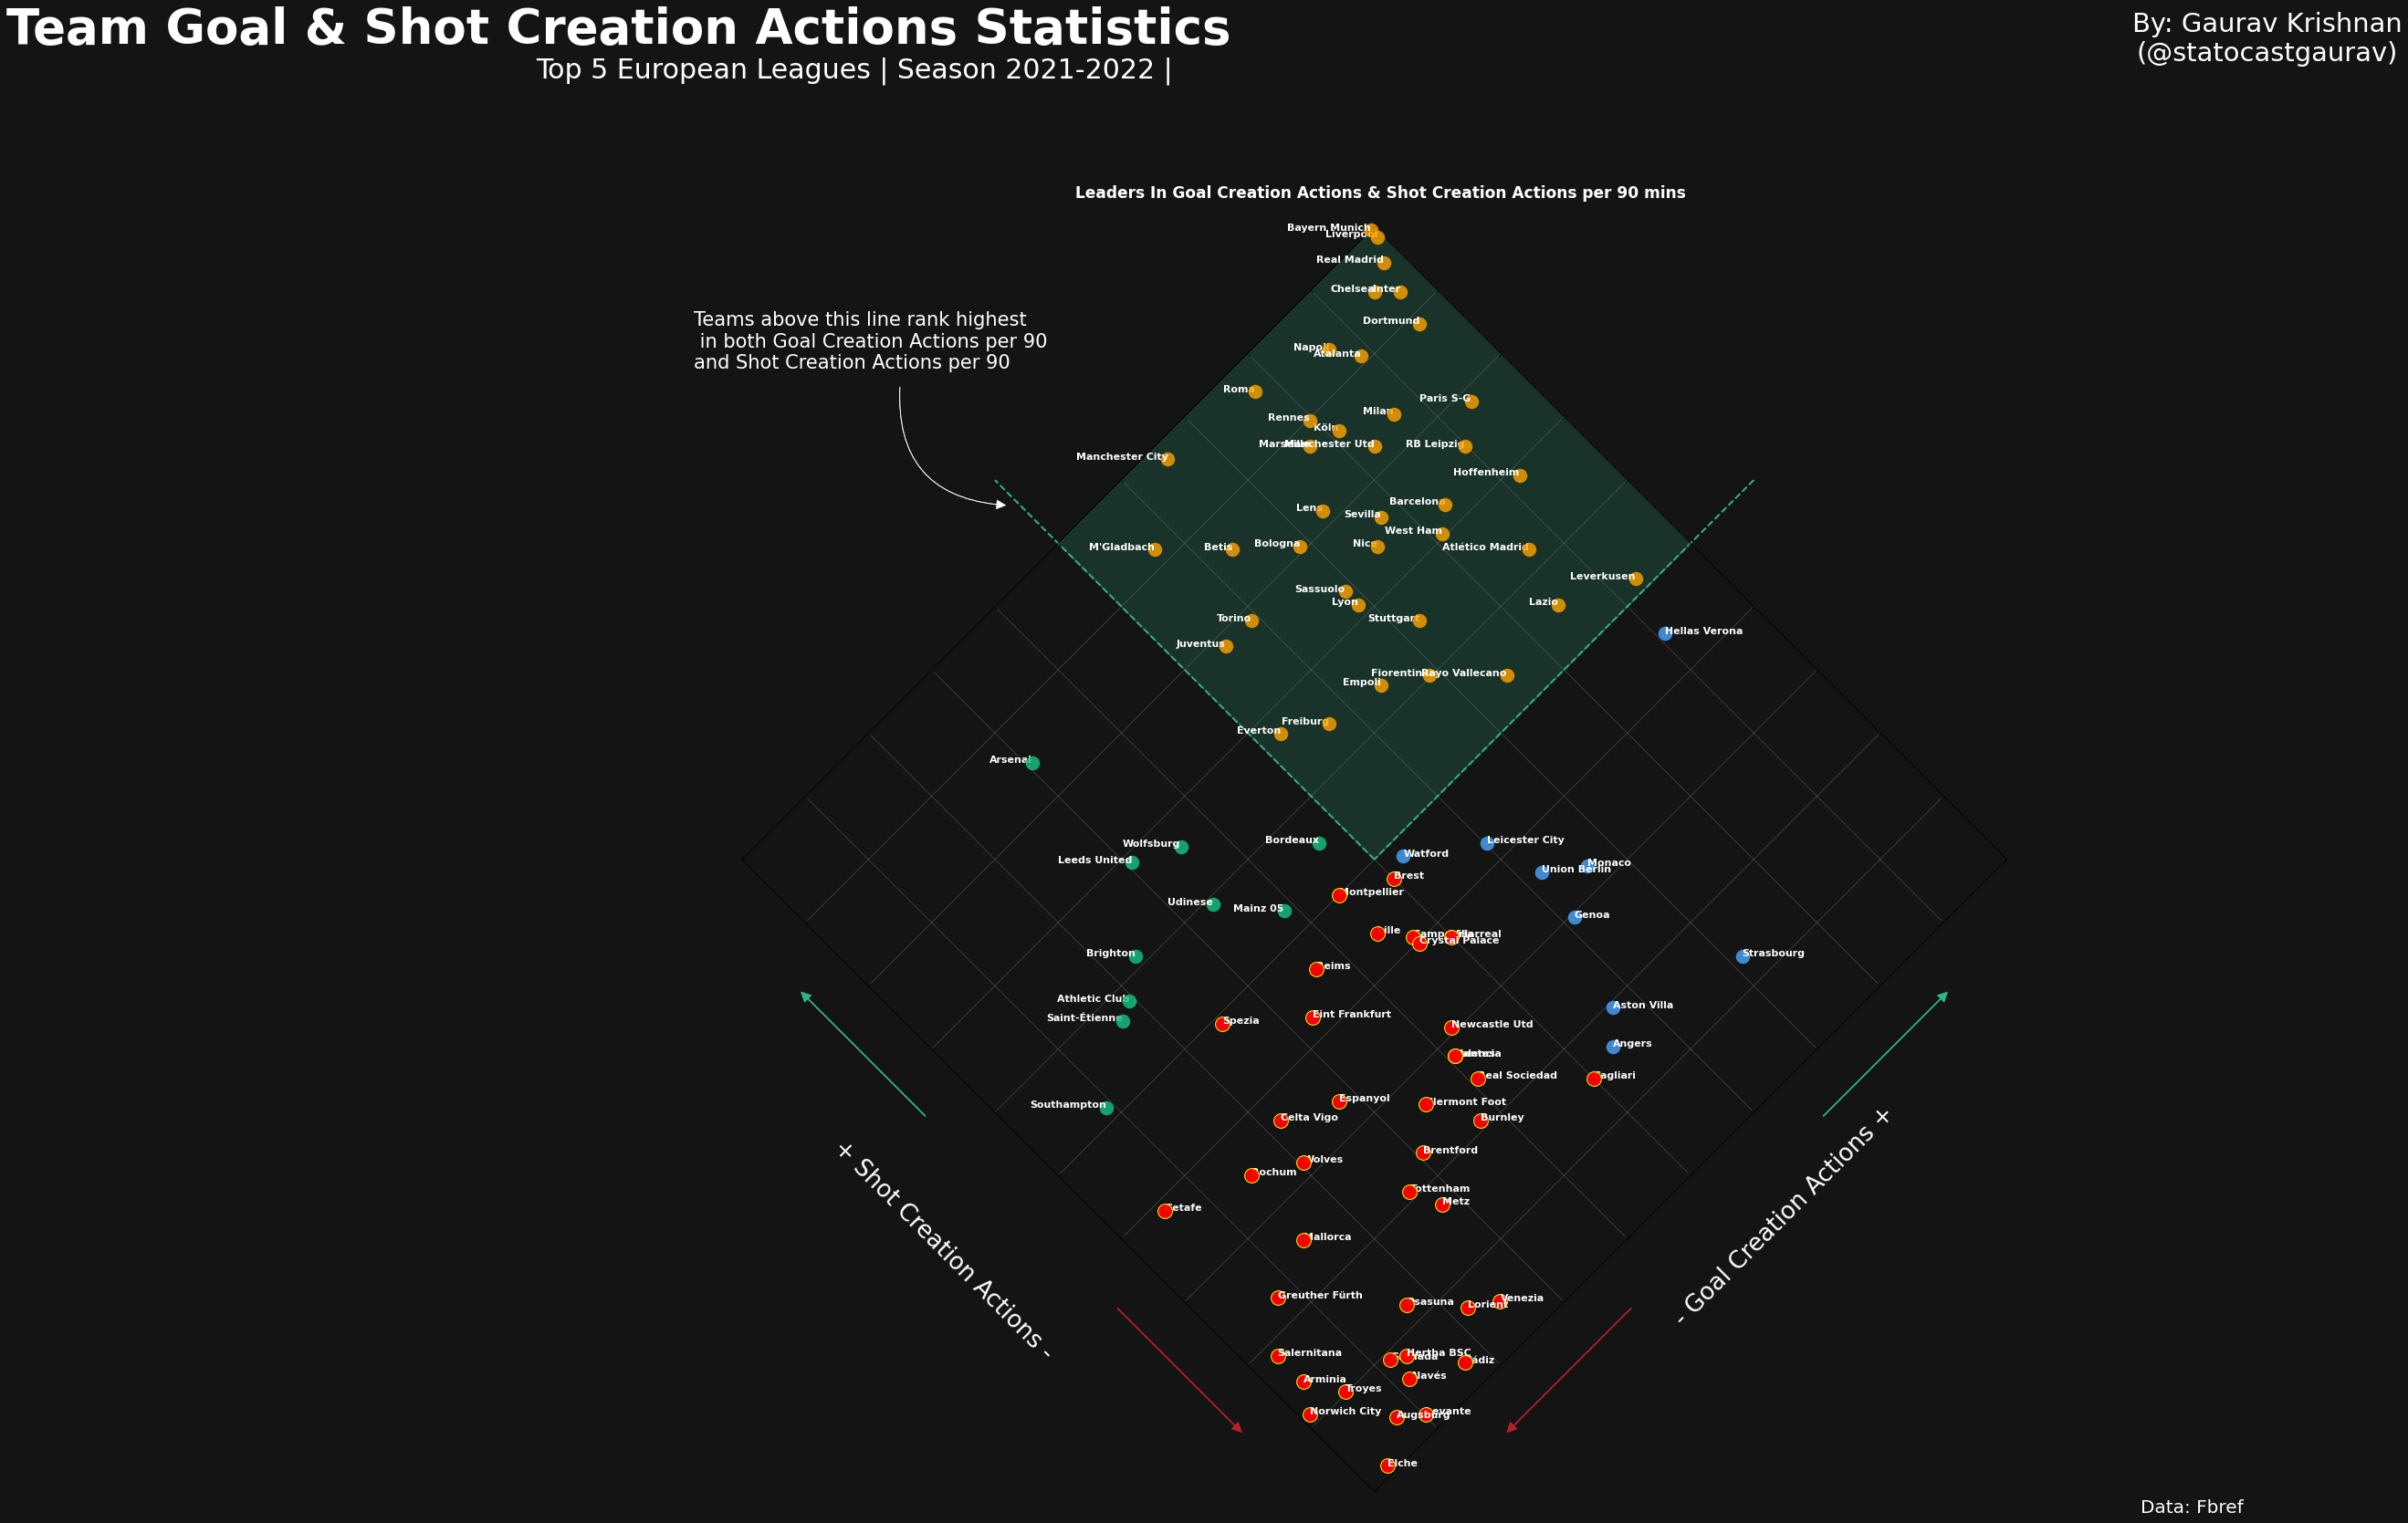

In [ ]:
fig

In [ ]:
plt.savefig("Top5_teams_gca_sca_2022.jpg",facecolor=bg,bbox_inches="tight", dpi=800)

<Figure size 432x288 with 0 Axes>

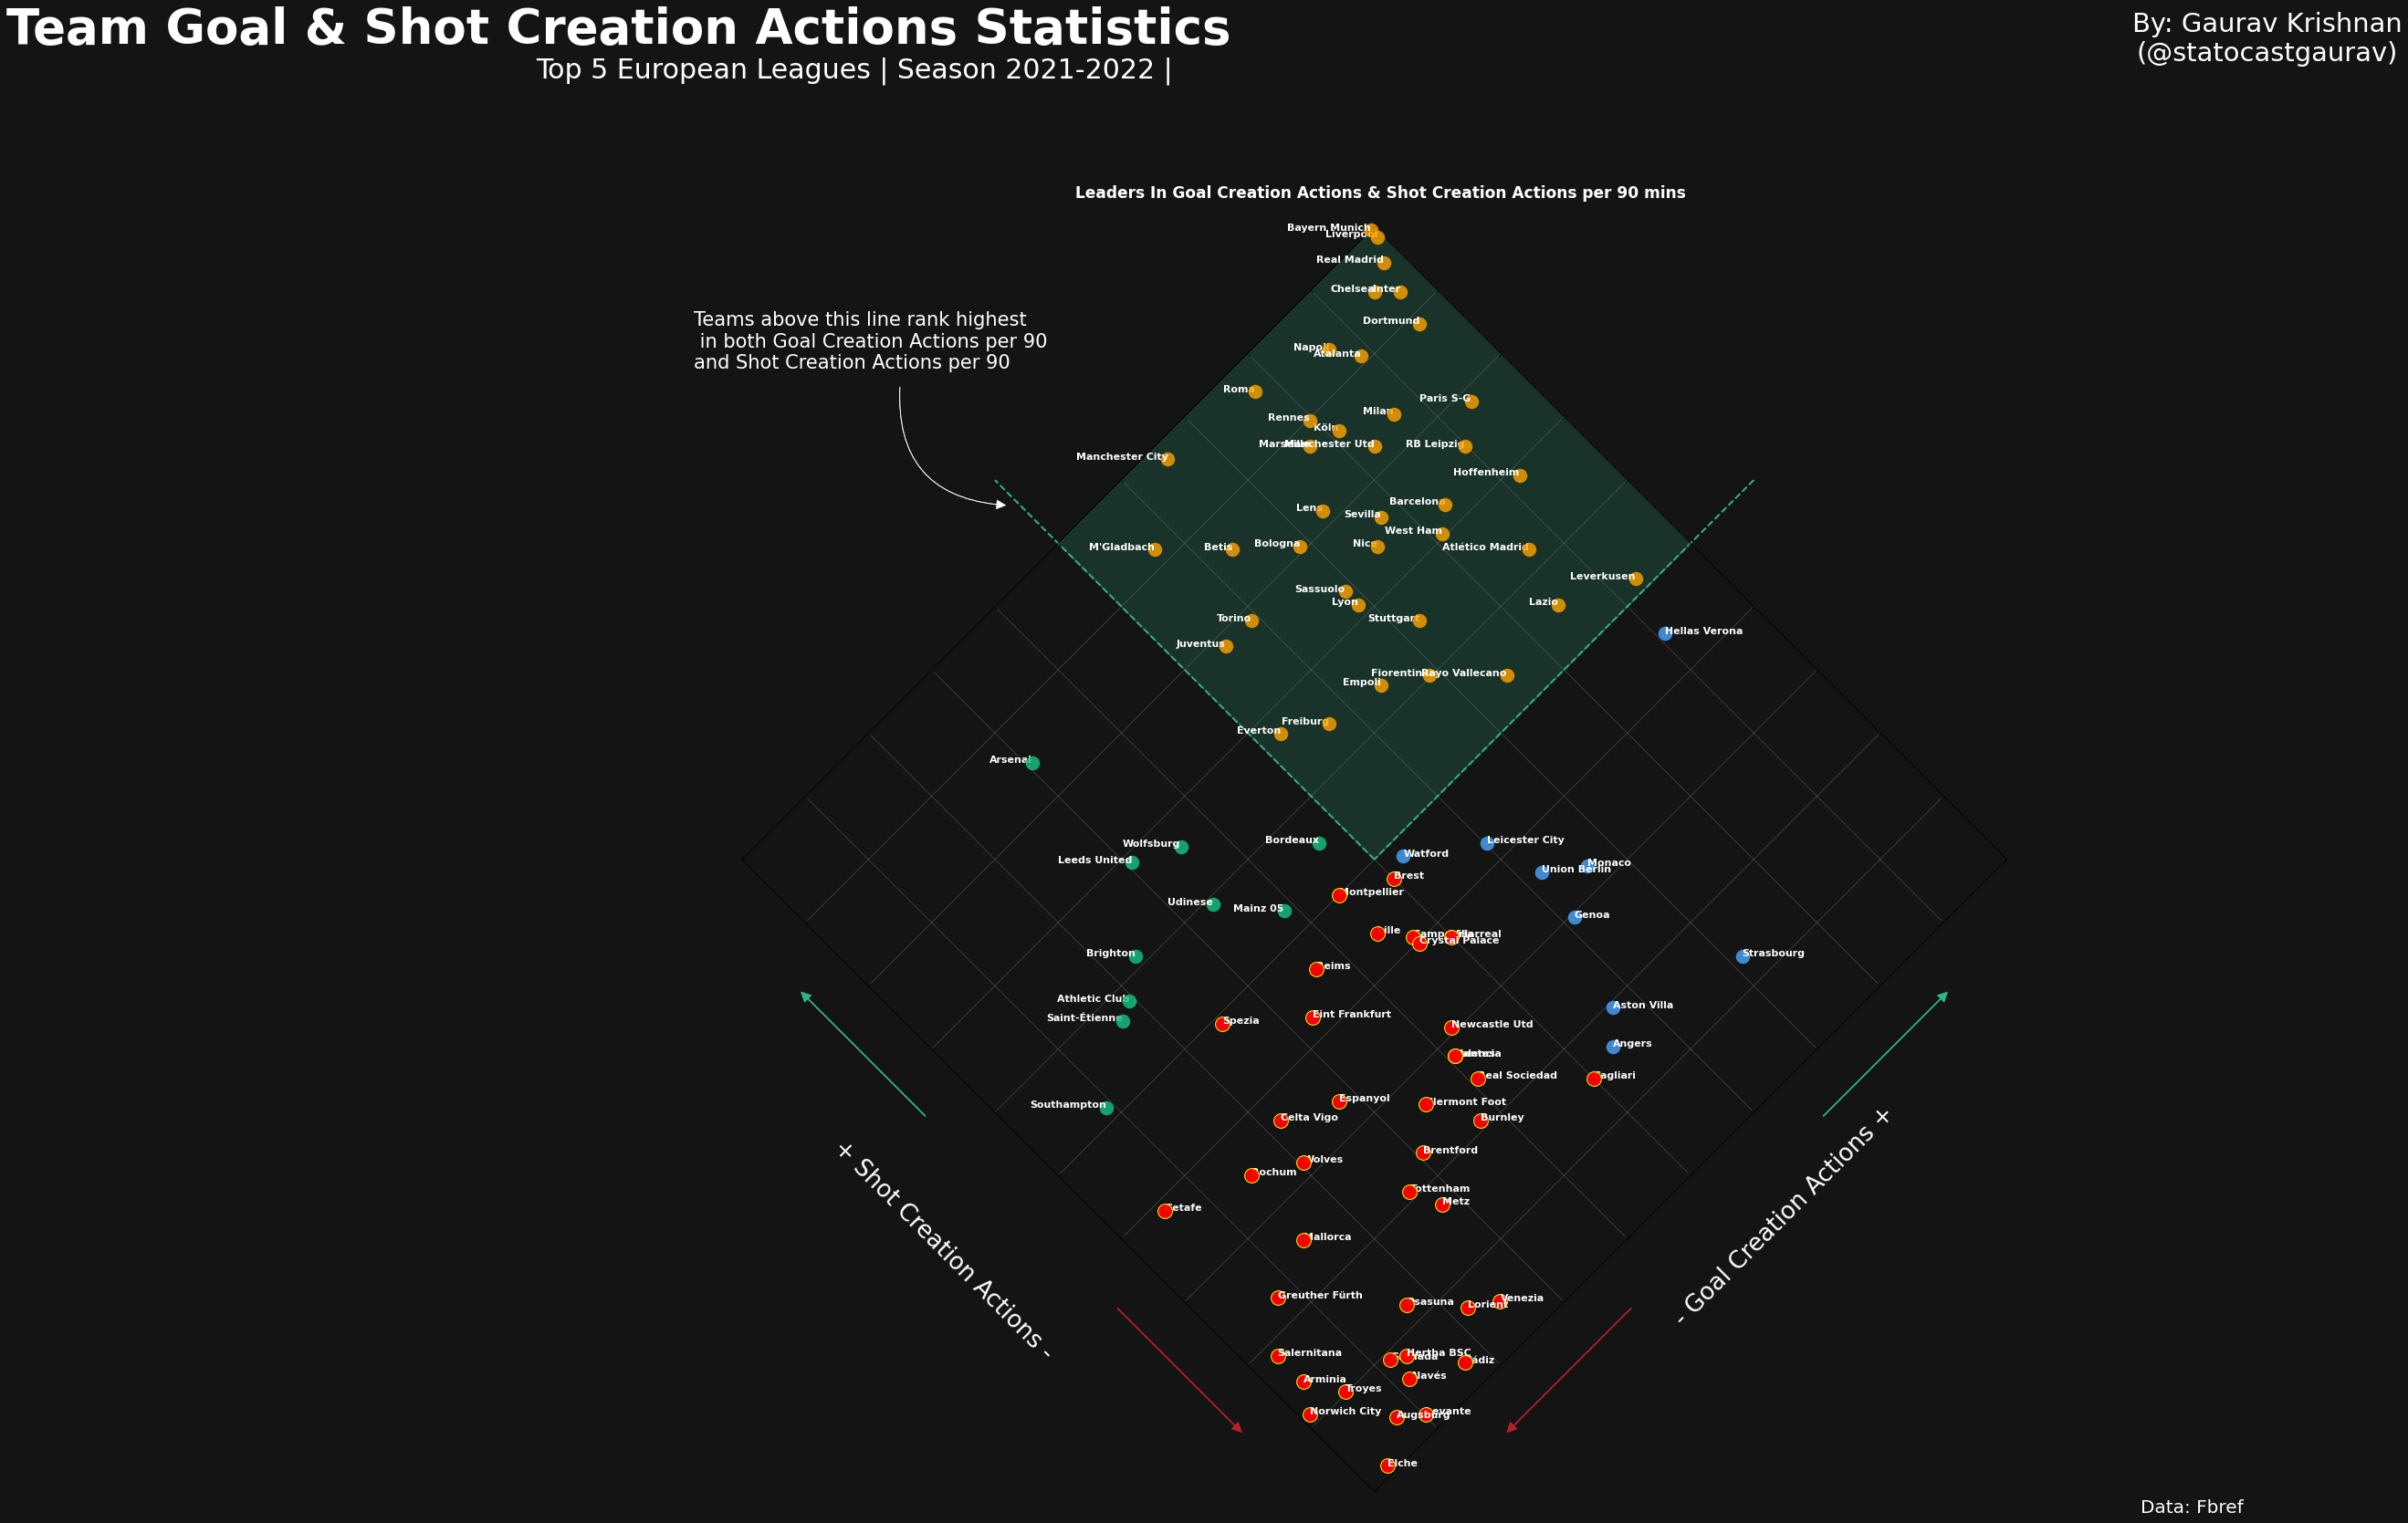

In [ ]:
fig